## Miary

Dysponując zbiorem danych chcemy zazwyczaj określić jakieś jego charakterystyki, metryki pozwalające w zwięzły sposób określić nam jakieś cechy tego zbiory. Takie wartości nazywamy miarami. Statystki opisowe dzielimy na trzy grupy:
- miary tendencji centralnych
- miary rozproszenia
- miary asymetrii

Omówmy każdy z typów z osobna

### 1. Miary tendencji centralnej

Miary tendencji centralnej aka miary centralne (**ang. Measures of central tendency**), to takie miary które wskazują na centralne (bliskie środka) wartości cechy w rozkładzie. Najpopularniejszymi miarami tendencji centralnej są: 

A. średnia \
B. mediana \
C. dominanta

#### A. Średnia

Średnia (**ang. mean aka simple average**), to wartość, która reprezentuje przeciętną wielkość zbioru danych, obliczaną przez podzielenie sumy wszystkich wartości przez ich liczbę. Do jej oznaczenia używamy symbolu:
- $\mu$ dla średniej z całej populacji
- $\bar{x}$ dla średniej z próbki

Wzory na średnią to odpowiednio:
- dla populacji

$$ \mu = \frac{\sum_{i=1}^N x_{i}}{N} = \frac{x_1 + x_2 + x_3 + ... + x_{N-1} + x_N}{N} $$

- dla próby

$$ \bar{x} = \frac{\sum_{i=1}^n x_{i}}{n} = \frac{x_1 + x_2 + x_3 + ... + x_{n-1} + x_n}{n} $$

Przykład

Załóżmy, że chcemy zorientować się jakie są ceny pizz w Polsce. W tym celu idziemy do kilku pizzerii w dwóch miastach w Polsce i spisujemy ceny.

In [1]:
# Ceny pizz w 10 restauracjach
import random

# 10 cen pizz w warszawskich i krakowskich pizzeriach
warszawa_pizza_prices = [20, 25, 30, 30, 40, 45, 50, 55, 60, 65, 75]
krakow_pizza_prices = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
    
pizza_prices = {
    "Warszawa": warszawa_pizza_prices,
    "Krakow": krakow_pizza_prices
}

In [2]:
# Dane, ramka danych
import pandas as pd

pizza_df = pd.DataFrame(pizza_prices)
pizza_df

,Warszawa,Krakow
0,20,20
1,25,25
2,30,30
3,30,35
4,40,40
5,45,45
6,50,50
7,55,55
8,60,60
9,65,65


Policzmy średnią cenę pizzy w Warszawie.
(populacja czy próbka?)

$$\bar{x}=\frac{20 + 25 + 30 + 30 + 40 + 45 + 50 + 55 + 60 + 65 + 75}{11}=45.00$$

In [6]:
# średnia z restauracji warszawskich
warszawa_mean = pizza_df["Warszawa"].sum() / pizza_df["Warszawa"].size
warszawa_mean

np.float64(45.0)

i średnią w Krakowie

$$\bar{x}=\frac{20 + 25 + 30 + 35 + 40 + 45 + 50 + 55 + 60 + 65 + 70}{11}=45$$

In [8]:
# średnia z restauracji krakowskich
krakow_mean = pizza_df["Krakow"].mean()
krakow_mean

np.float64(45.0)

In [9]:
# Statystyki serii
pizza_df.describe()

,Warszawa,Krakow
count,11.000000,11.000000
mean,45.000000,45.000000
std,17.748239,16.583124
min,20.000000,20.000000
25%,30.000000,32.500000
50%,45.000000,45.000000
75%,57.500000,57.500000
max,75.000000,70.000000


Czy średnia jako miara tendencji centralnej zbioru ma jakieś wady?

Tak.

1. Wartość średniej zbioru często nie jest jednym z elementów tego zbioru, co może prowadzić od nieporozumień. 

2. Średnia jest bardzo podatna na outliery. Co to są outliery ? To tzw. wartości odstające. Spójrzmy na przykład.
Powiedzmy, że w Warszawie odwiedziliśmy jeszcze jedną restauracje. Była super elegancką, bardzo droga i pizza w niej kosztowała 500 zł. 

In [10]:
# Dodajemy obserwacje
pizza_df.loc[11] = [500, None]
pizza_df

,Warszawa,Krakow
0,20.0,20.0
1,25.0,25.0
2,30.0,30.0
3,30.0,35.0
4,40.0,40.0
5,45.0,45.0
6,50.0,50.0
7,55.0,55.0
8,60.0,60.0
9,65.0,65.0


Sprawdźmy jak będzie wyglądała teraz średnia cena pizzy w Warszawie na podstawie naszej próby.

In [11]:
# średnia dla nowych danych
pizza_df["Warszawa"].mean()

np.float64(82.91666666666667)

In [23]:
pizza_df["Krakow"].mean()

np.float64(45.0)

Średnia poszła mocno w górę i mimo, że patrząc na nasz zbiór prawdopodobieństwo, że idąc do losowo wybranej restauracji będziemy musieli zapłacić powyżej 80 zł za pizze jest bardzo niskie, to średnia wychodzi powyżej 80 zł. Jest znacznie wyższa niż w Krakowie i w ogóle nie należy do zbioru.

Wniosek: sama średnia może nie wystarczyć, by wyciągnąć trafne wnioski. Jak możemy się ochronić przed tym problemem? Możemy obliczyć drugi wskaźnik - medianę.

#### B. Mediana

Mediana aka wartość środkowa (**ang. median**) to „środkowa” liczba w uporządkowanym zbiorze danych. Aby obliczyć medianę, musimy posortować nasze dane w porządku rosnącym. Mediana to liczba znajdująca się na pozycji $n+1$ podzielonej przez dwa w posortowanej liście, gdzie $n$ to liczba obserwacji. Jeżeli zbiór posiada nieparzystą liczbę obserwacji to mediana będzie dokładnie środkową wartością $X[\frac{n+1}{2}]$. Jeżeli zbiór posiada parzystą liczbę obserwacji to mediana będzie średnią z dwóch środkowych wartości (odpowiednio $X[\frac{n}{2}]$ i $X[\frac{n}{2}+1]$).

$$
Med(X) = 
\begin{cases}
    X[\frac{n+1}{2}] & \text{jeżeli n jest liczbą nieparzystą}\\
    \frac{X[\frac{n}{2}] + X[\frac{n}{2} +1 ]}{2} & \text{jeżeli n jest liczbą parzystą}
\end{cases}
$$

Oznaczenia są dla próbki. Jeżeli chcielibyśmy to samo napisać dla populacji należałoby zamienić $n$ na $N$.

Posortujmy ceny

In [16]:
# Dodajemy kolumny z posortowanymi cenami
pizza_df['Warszawa_sorted'] = pizza_df['Warszawa'].sort_values().reset_index(drop=True)
pizza_df['Krakow_sorted'] = pizza_df['Krakow'].sort_values().reset_index(drop=True)
pizza_df

,Warszawa,Krakow,Warszawa_sorted,Krakow_sorted
0,20.0,20.0,20.0,20.0
1,25.0,25.0,25.0,25.0
2,30.0,30.0,30.0,30.0
3,30.0,35.0,30.0,35.0
4,40.0,40.0,40.0,40.0
5,45.0,45.0,45.0,45.0
6,50.0,50.0,50.0,50.0
7,55.0,55.0,55.0,55.0
8,60.0,60.0,60.0,60.0
9,65.0,65.0,65.0,65.0


I teraz znajdźmy wartość środkową.

- dla warszawskich pizzeri:
$$n=10 \implies \text{n jest parzyste} \implies Med(X) = \frac{X[\frac{n}{2}] + X[\frac{n}{2}+1]}{2} = \frac{45+50}{2} = 47.50$$

- dla krakowskich pizzeri:
$$n=10 \implies \text{n jest parzyste} \implies Med(X) = \frac{X[\frac{n}{2}] + X[\frac{n}{2}+1]}{2} = \frac{45+50}{2} = 47.50$$

In [17]:
# Funkcja do liczenia mediany
def median(data: pd.DataFrame) -> int:
    """Kod nie zgadza się ze wzorem, ponieważ w pythonie indeksujemy od zera."""
    n = data.size
    if n % 2 == 0:
        return (data[n//2] + data[n//2-1]) / 2
    else:
        return data[n//2]

In [20]:
# Mediana warszawskich cen pizz
median(pizza_df["Warszawa_sorted"])

np.float64(47.5)

In [21]:
# Mediana krakowskich cen pizz
median(pizza_df["Krakow_sorted"])

np.float64(47.5)

Można też policzyć ją bezpośrednio

In [25]:
# metoda `median`
pizza_df["Warszawa"].median()

np.float64(47.5)

In [27]:
# metoda `median`
pizza_df["Krakow"].median()  # metoda `median` odrzuciła wpisy z wartością NaN przed policzeniem wartości liczbowej

np.float64(45.0)

Zwróć uwagę, na to że nie ma różnicy jak droga była pizza w tej super eleganckiej restauracji. Nawet jeżeli za tą pizze zapłaciliśmy 1 milion, to mediana i tak pozostanie taka sama. Mediana jest znacznie mniej podatna na wpływ outlierów od średniej. Do pełnego zestawienia brakuje nam jednak wciąż jednej miary - dominanty.

Uogólnieniem mediany są **kwantyle** omówione w dodatku.

#### C. Dominanta

Dominanta (**ang. mode**) to wartość, która występuje najczęściej w zbiorze. Może być liczona zarówno na zbiorze danych kategorycznych jak i liczbowych, ale zostaniemy przy liczbowych danych.

In [30]:
# Znajdowanie dominanty, metoda `mode`
warszawa_mode = pizza_df["Warszawa"].mode()[0]
warszawa_mode

np.float64(30.0)

In [35]:
# Dominanta, metoda, metoda `mode`
krakow_mode = pizza_df["Krakow"].mode()[0]
krakow_mode

np.float64(20.0)

Każdy z krakowskich pomiarów występuje w zbiorze tylko raz, dlatego krakowski zbior nie posiada dominanty (albo wszystkie pomiary są dominantami). Python podaje pierwszą napotkaną wartość.

Najczęściej spotykana cena pizzy w Warszawie to zaledwie 30zł, mimo że średnia i mediana sugerowały, że jest znacznie droższa.

**Podsumowanie**

Poznaliśmy trzy miary tendencji centralnej. Która z nich jest najlepsza ?

Przykład pizzami pokazuje, że miary tendencji centralnej powinny być stosowane łącznie, a nie osobno. Każda z nich daje nam inny wgląd w dane. Nie ma więc jednej najlepszej miary, ale używanie tylko jednej jest zdecydowanie najgorszym rozwiązaniem

Przejdźmy do kolejnego typu miary - miary rozproszenia.

### 2. Miary rozproszenia

Miary rozproszenia aka miary zmienności, miary dyspersji (**ang. Measure of variability**) służą do oszacowywania zmienności danych w zbiorze. Czyli mając już wartość centralną, przechodzimy do kolejnej cechy jaką jest siła rozproszenia danych wokół tej wartości. Im dane są bardziej oddalone od wartości centralnej tym zmienność danych w tym zbiorze jest większa. Isnieje wiele miar rozproszenia. Do najpopularniejszych należą:

1. Warianacja
2. Standardowe odchylenie
3. Współczynnik zmienności

Omówmy je kolejno.

#### 1. Wariancja

Wariancja mierzy odległość wszystkich punktów zbioru od średniej.

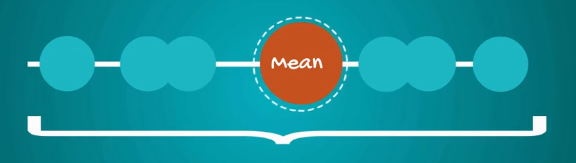

Zanim skupimy się na wariancji powtórzmy jeden, istotny fakt dotyczący statystyk.

Kiedy nasze pomiary dotyczą całej populacji mamy pomierzone wszystko i w związku z tym możemy być w 100% pewni w sprawie wyliczanych parametrów. Kiedy dane, którymi dysponujemy są jedynie próbką z całej populacji wyliczone statystyki możemy traktować wyłącznie jako przybliżenie, aproksymacje (mówimy estymator) parametrów całej populacji. Co więcej jeżeli weźmiemy 10 różnych próbek z tej samej populacji otrzymamy 10 różnych przybliżeń tego samego parametru. 

Statystycy rozwiązali ten problem dostosowując formuły dla poszczególnych statystyk, w taki sposób, żeby uwzględniały ten fakt. Dlatego formuły na statystyki często podajemy w dwóch postaciach: dla całej populacji i dla próbki. Tak jak to było w przypadku średniej.

Średnia dla populacji:
$$ \mu = \frac{\sum_{i=1}^N x_{i}}{N} $$

Średnia dla próbki
$$ \bar{x} = \frac{\sum_{i=1}^n x_{i}}{n} $$

i są to dwie różne rzeczy. Mimo, że liczone sie identycznie. Akurat w przypadku średniej liczone są identycznie. W przypadku innych statystyk już niekoniecznie.

Dobrze, to teraz wróćmy do wariancji.

Przyjmijmy jakiś prosty zbiór danych i przyjmijmy, że dane reprezentują całą populacje.

In [36]:
# Przykładowa populacja
import pandas as pd

data = {
    "population": [1, 2, 3, 4, 5]
}
population_df = pd.DataFrame(data)
population_df

,population
0,1
1,2
2,3
3,4
4,5


W jaki sposób moglibyśmy oszacować stopień zmienności tych danych. Jedną z pierwszych propozycji jest policzenie odległości każdego z punktów od średniej, a potem znalezienie średniej z tych wartości. Czyli policzenie średniej odległości wszystkich punktów zbioru od średniej. Spróbujmy

Liczymy średnią

In [38]:
# Średnia populacji
mean = population_df['population'].mean()
mean

np.float64(3.0)

Teraz odległości.

$$\sum_{i=1}^N (x_i-\mu) = (1-3) + (2-3) + (3-3) + (4-3) + (5-3)$$

In [39]:
# Odległości obserwacji od wartości średniej
population_df['distance'] = population_df['population'] - mean
population_df

,population,distance
0,1,-2.0
1,2,-1.0
2,3,0.0
3,4,1.0
4,5,2.0


A teraz policzmy średnią z tych odległości.

$$\frac{\sum_{i=1}^N (x_i-\mu)}{N}$$

In [40]:
# Średnia odległość
mean_dist = population_df['distance'].mean()
mean_dist

np.float64(0.0)

0, hmm ?

Ale zaraz, czy to przypadkiem właśnie nie 0 powinno wyjść? Przecież średnia to jest punkt równoodelgły od wszystkich punktów tego zbioru. Taki punk ciężkości. Czyli średnia odległość punktów od średniej nie jest dobrą miarą. 

W jaki sposób moglibyśmy uniknąć wyzerowania wartości? Punkty leżą po obu stronach średniej w związku z tym odległości są zarówno dodatnie jak i ujemne. Jeżeli pozbędziemy się znaku to wartość się nie wyzeruje. W jaki sposób możemy pozbyć się znaku? Na przykład podnosząc do kwadratu każdą odległość.

$$\frac{\sum_{i=1}^N (x_i-\mu)^2}{N} = \frac{(1-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (5-3)^2}{5} = \frac{4+1+0+1+4}{5}=\frac{10}{5}=2$$

Taką wartość nazywamy właśnie **wariancją** i oznaczamy $\sigma^2$.

In [42]:
# Kwadrat odległości obserwacji od wartości średniej
population_df['distance_sq'] = population_df['distance']**2
population_df

,population,distance,distance_sq
0,1,-2.0,4.0
1,2,-1.0,1.0
2,3,0.0,0.0
3,4,1.0,1.0
4,5,2.0,4.0


In [44]:
# średni kwadrat odległości
mean_distance_sq = population_df['distance_sq'].mean()
mean_distance_sq

np.float64(2.0)

Albo po prostu

In [46]:
# Wariancja, metoda `var`
population_df['population'].var(ddof=0)

np.float64(2.0)

Podsumujmy wywód formułami. Wariancja wyraża się wzorem:

- dla populacji
$$\sigma^2 = \frac{\sum_{i=1}^{N} (x_i-\mu)^2}{N}$$

- dla próby
$$s^2 = \frac{\sum_{i=1}^{n} (x_i-\bar{x})^2}{n-1}$$

Ale zaraz, skąd n-1 w mianowniku w wzorze na wariancję dla próby ?

No i tu właśnie wychodzi różnica pomiędzy statystyką na próbie, a parametrem populacji. Ogólnie, żeby wykazać że taki wzór lepiej przybliża wartość parametru populacji należałoby przeprowadzić względnie złożony wywód matematyczny. Nie będziemy przez niego przechodzić. Zadowolimy się wyjaśnieniem intuicyjnym. 

W populacji zdarzają się wartości odstające. One odstają od całej reszty, co oznacza że musi być ich znacznie mniej. W związku z tym prawdopodbieństwo tego, że znajdą się w naszej próbie jest niewielkie. Ale przecież, te odstające punkty mają duży wpływ na wartość rozproszenia danych w całej populacji. I po to, żeby wartość rozproszenia na próbie lepiej przybliżała wartość rozproszenia na całej populacji, niejako "sztucznie" zwiększamy wartość rozproszenia na próbie poprzez zmniejszenie wartości w mianowniku. Zabieg ten nazywany jest czasami korektą Bassela (odjęcie dokładnie 1 od liczebności próby).

Popatrzmy. 

Policzmy wariancję przy założeniu, że pracujemy na całej populacji i przy założeniu, że pracujemy na próbie.

$$\sigma^2 = \frac{4+1+0+1+4}{5} = \frac{10}{5} = 2$$

$$s^2 = \frac{4+1+0+1+4}{4} = \frac{10}{4} = 2.5$$

Rzeczywiście przy założeniu, że pracujemy na próbie nasze przybliżenie (estymacja) ma większą wartość.

Właśnie za to odpowiada parametr `ddof`.

In [47]:
# Wariancja, parametr `ddof` metody `var`
population_df['population'].var(ddof=0)

np.float64(2.0)

In [50]:
# Wariancja, parametr `ddof` metody `var`
population_df['population'].var(ddof=1)

np.float64(2.5)

Skąd ta nazwa?

`ddof` - zmiana stopni swobody (**ang. delta degree of freedom**) jest to wartość którą mamy odjąć w mianowniku. Dla 0 oznacza, że nic nie odejmujemy. Dlaczego stopnie swobody? Chodzi o to, że wariancję liczymy na podstawie średniej. To znaczy zanim przystąpimy do obliczeń wariancji, średnia jest już ustalona, sztywna. Ponieważ średnia próbki jest już wyznaczona, jeden punkt nie może być już swobodnie wybrany — jego wartość jest zależna od pozostałych wartości. W związku z tym rzeczywista liczba swobodnych obserwacji wynosi 𝑛−1, a nie 𝑛.

**Wstęp do teorii estymacji.**

Jednym z ważnych działów statystyki jest dział zajmujący się estymacją, czyli przybliżaniem wartości parametru populacji na podstawie wartości statystyki z próbki. W tym dziale posługujemy się terminem estymatora.

Statystyka na próbce jest **estymatorem** parametru populacji. Na przykład mówimy, że średnia próbki $\bar{x}$ jest estymatorem średniej populacji $\mu$:

$$\bar{x}\quad \widehat{=}\quad \mu$$

Jeżeli ten estymator prawidłowo przybliża nam wartość parametru populacji, taki estymator nazywamy **estymatorem nieobciążonym** (ang. unbiased estimator). Przykładem estymatora nieobciążonego jest właśnie średnia próbki. $\bar{x}$ jest nieobciążonym estymatore $\mu$. Jeżeli estymator nieprawidłowo przybliża wartość parametru populacji (systematycznie zaniża lub zawyża wartość parametru) nazywamy go **estymatorem obciążonym** (ang. biased estimator). Przykładem estymatora obciążonego jest estymator wariancji próby bez poprawki Bassela.

Wartość jaką zwraca nam estymator nazywamy **estymatą** (ang. estimate).

Ale co to znaczy prawidłowo przybliża wartość? W kontekście teorii estymacji oznacz to tyle, że jeżeli weźmiemy wiele prób i policzymy estymaty dla każdej próby i znajdziemy średnią estymatę, to ta średnia estymata będzie zbiegała do wartości estymowanej (czyt. parametru populacji) wraz ze wzrostem liczby prób.

**Ciekawostka**

Czy jedynym sposobem na pozbycie się znaku jest użycie kwadratu? \
Oczywiście nie, możemy na przykład policzyć wartość bezwzględną. Ze względu na brak gładkości wartości bezwzględnej w teorii i formułach używa się najczęściej funkcji kwadratowej (która jest gładka). Znacznie ułatwia to zapis formalny. Na poziomie implementacji, punktowy brak różniczkowalność nie stanowi jednak żadnego problemu. Wystarczy wstawić w punkcie osobliowości wartość 0.

Które rozwiązanie jest lepsze z punktu widzenia otrzymywanych wartości? \
Kwadrat podbija mocno outliery, czyli przy użyciu kwadratów będziemy bardziej podatni na wpływ wartości odstających. Możemy chcieć uwypuklić wpływ wartości mocno różniących się od średniej, ale równie dobrze możemy tego nie chcieć. Z kolei wartość bezwzględna tłumi wpływ niewielkich odstępstw. Oba rozwiązania mają swoje plusy i minusy. 

W teorii błędów oba podejścia mają swoje nazwy. W przypadku użycia kwadratów mówimy o średnim błędzie kwadratowym, w przypadku użycia wartości absolutnej wynik nazywamy średnim błędem absolutnym. Mam też hybrydę, którą nazywamy błędem Hubera. 

Przejdźmy do kolejnej miary - odchylenie standardowe.

#### 2. Standardowe odchylenie

Odchylenie standardowe to nic innego jak pierwiastek z wariancji. I tak, odpowiednie formuły mają postać:
- dla całej populacji
$$\sigma = \sqrt{\sigma^2}$$
- dla próby
$$s = \sqrt{s^2}$$

Dla naszego zbioru

In [51]:
population_df

,population,distance,distance_sq
0,1,-2.0,4.0
1,2,-1.0,1.0
2,3,0.0,0.0
3,4,1.0,1.0
4,5,2.0,4.0


standardowe odchylenie wynosi

In [52]:
# Standardowe odchylenie
population_df['population'].var(ddof=0)**(1/2)

np.float64(1.4142135623730951)

Albo po prostu

In [53]:
# Standardowe odchylenie, metoda `std`
population_df['population'].std(ddof=0)

np.float64(1.4142135623730951)

Pytanie, które w tym miejscu się często pojawia to po co wymyślać standardowe odchylenie? Nie wystarczy nam wariancja? Po co tak udziwniać? I odpowiedzią na to pytanie są jednostki.

We wzorze na wariancję mamy kwadrat. Przyjmijmy, że mamy zbiór odległości jakie 10 osób przeszło w 10 minut. Odległości mamy podane w metrach.

In [54]:
# Generujemy dane
import random

random.seed(42)

data = {
    'distances':  [round(random.uniform(670, 900), 2) for _ in range(10)]
}
distance_df = pd.DataFrame(data)
distance_df

,distances
0,817.07
1,675.75
2,733.26
3,721.34
4,839.39
5,825.64
6,875.20
7,690.00
8,767.04
9,676.85


Policzmy średnią

In [59]:
# Średnia
mean = distance_df['distances'].mean()
mean

np.float64(762.154)

Policzmy wariancję

In [60]:
# Wariancja
var = distance_df['distances'].var(ddof=0)
var

np.float64(4826.417924)

Średnia: $762 \text{m}$, wariancja: $4826 \text{m}^2$. 

Metrów do kwadratu? Ile to? Jak to się ma do naszych wartości w zbiorze? Średnia $760 \text{m}$ - ok. Intuicyjnie rozumiemy co to oznacza. Średnio przeszli $760 \text{m}$. Ale $4826 \text{m}^2$? Wariancja naszego zbioru to $4826 \text{m}^2$, czyli ile ? 

$$762 \text{m} \pm 4826 \text{m}^2$$

Co to w ogóle jest? Jakieś pole? Może pole.

To może zamiast brać to pole jako miarę rozproszenia, weźmy bok kwadratu, który rozpina to pole. Będziemy mieli te same jednostki. Czyli ... pierwiastek.

In [61]:
# Odchylenie standardowe
std = distance_df['distances'].std(ddof=0)
std

np.float64(69.47242563780252)

I teraz:

$$\mu \pm \sigma = 762 \text{m} \pm 70 \text{m}$$

No i teraz to inna rozmowa. Te same jednostki, widzimy że taki zapis definiuje nam jakiś przedział. Co to za przedział to już trochę inny temat, ale intuicyjnie rozumiemy, że rozproszenie naszych danych jest mniej więcej na poziomie przedziału:

$$(762-70, 762+70) = (692, 832)$$

To jest całkiem sensowna i intuicyjna miara rozproszenia danych. To właśnie dlatego odchylenie standardowe jest najpopularniejszą miarą rozproszenia danych. Bardzo często wykorzystujemy odchylenie standardowe, żeby oszacować wielkość błędu w otrzymanych wartościach. Robimy obliczenia, oczekujemy otrzymać jakąś wartość. Otrzymujemy różne wartości, mniej lub bardziej zbliżone do tej której oczekujemy. Standardowe odchylenie pomaga nam oszacować jak bardzo mylimy się w naszych obliczeniach.

#### 3. Współczynnik zmienności

Współczynnik zmienności aka względne odchylenie standardowe (ang. coefficient of variation (cv) aka relative standard devition) jest równy odchyleniu standardowemu podzielonemu przez średnią. Wyraża się wzorem:

- dla populacji
$$c_{v} = \frac{\sigma}{\mu}$$

- dla próby
$$\quad \hat{c_{v}} = \frac{s}{\bar{x}}$$

I jest niczym innym jak standardowym odchyleniem wyrażonym w "jednostkach średniej". Czyli miarą rozproszenia odpowiadającą odchyleniu standardowemu wyrażonemu jako część (lub wielokrotność) średniej.

W naszym przypadku:

$$\sigma = 70$$
$$\mu = 763$$

Zatem

$$c_v = \frac{\sigma}{\mu} = \frac{70}{763} = 0.09$$

In [62]:
# Współczynnik zmienności
vc = std/mean
vc

np.float64(0.09115274030944208)

Odchylenie standardowe jest świetną miarą rozproszenia pojedynczego zbioru. Nie sprawdza się jednak przy porównywaniu zmienności dwóch różnych zbiorów.

No bo spójrz. Wydaje się być trochę czymś innym sytuacja, w której średnia wynosi 2 a standardowe odchylenie 3, a innym sytuacja w której średnia wynosi 1680, a standardowe odchylenie 3. W związku z tym porównywanie odchyleń standardowych dwóch różnych zbiorów nie ma większego sensu. Standardowe odchylenie nie pozwoli nam w sposób wiarygodny porównać stopnia rozproszenia tych dwóch, różnych zbiorów. W tym miejscu sprawdza się natomiast świetnie współczynnik zmienności.

### Przykład

Wróćmy do przykładu z pizzami.

In [63]:
# Dane o pizzach
pizza_df

,Warszawa,Krakow,Warszawa_sorted,Krakow_sorted
0,20.0,20.0,20.0,20.0
1,25.0,25.0,25.0,25.0
2,30.0,30.0,30.0,30.0
3,30.0,35.0,30.0,35.0
4,40.0,40.0,40.0,40.0
5,45.0,45.0,45.0,45.0
6,50.0,50.0,50.0,50.0
7,55.0,55.0,55.0,55.0
8,60.0,60.0,60.0,60.0
9,65.0,65.0,65.0,65.0


Skupmy się na warszawskich pizzeriach.

In [65]:
# Warszawskie pizze
warsaw_pizza_zl = pizza_df["Warszawa"]
warsaw_pizza_zl

0      20.0
1      25.0
2      30.0
3      30.0
4      40.0
5      45.0
6      50.0
7      55.0
8      60.0
9      65.0
10     75.0
11    500.0
Name: Warszawa, dtype: float64

Powiedzmy, że chcemy też przechowywać informacje o cenie pizzy w jenach. Na dzień 08.11.2024 przelicznik wynosi 1zł = 38yen. Zatem:

In [66]:
# Warszawskie ceny pizz w jenach
warsaw_pizza_yen = warsaw_pizza_zl * 38
warsaw_pizza_yen

0       760.0
1       950.0
2      1140.0
3      1140.0
4      1520.0
5      1710.0
6      1900.0
7      2090.0
8      2280.0
9      2470.0
10     2850.0
11    19000.0
Name: Warszawa, dtype: float64

In [68]:
# Ramka z cenami warszawskich cen
warsaw_pizza_df = pd.DataFrame({
    "zl": warsaw_pizza_zl,
    "yen": warsaw_pizza_yen
})
warsaw_pizza_df

,zl,yen
0,20.0,760.0
1,25.0,950.0
2,30.0,1140.0
3,30.0,1140.0
4,40.0,1520.0
5,45.0,1710.0
6,50.0,1900.0
7,55.0,2090.0
8,60.0,2280.0
9,65.0,2470.0


Znajdźmy teraz standardowe odchylenia obu tych zbiorów.

In [70]:
# Standardowe odchylenie warszawskich cen w złotówkach
std_zl = warsaw_pizza_df['zl'].std(ddof=1)
std_zl

np.float64(132.43280171353686)

In [72]:
# Standardowe odchylenie warszawskich cen w jenach
std_yen = warsaw_pizza_df['yen'].std()  # wartość domyślna ddof=1
std_yen

np.float64(5032.446465114401)

Odchylenia wydają się ogromnie różnić między sobą mimo, że mamy do czynienia z tym samymi danymi.

A współczynniki zmienności (relatywne odchylenia standardowe) ?

In [73]:
# Współczynnik zmienności warszawskich cen w złotówkach
std_zl / warsaw_pizza_df['zl'].mean()

np.float64(1.5971795181532082)

In [74]:
# Współczynnik zmienności warszawskich cen w jenach
std_yen / warsaw_pizza_df['yen'].mean()

np.float64(1.5971795181532082)

Są identyczne!

To pokazuje ogromną zaletę, jaką daje współczynnik zmienności. Teraz możemy z pełnym przekonaniem stwierdzić, że oba zbiory danych mają taką samą zmienność.

**Pytanie 1**

Janek chciał dowiedzieć się, ile dni w tygodniu ludzie w jego klasie ćwiczą, więc zapytał 3 swoich kolegów. Odpowiedzi, które otrzymał to 1, 3 i 5. Na podstawie tych odpowiedzi, które z poniższych stwierdzeń jest prawdziwe w odniesieniu do wyników, które uzyskał Janek?

Wskazówka: Czy liczby [1, 3, 5] reprezentują populację, czy próbę?

A. $\mu=3 \quad \sigma=2$ \
B. $\bar{x}=3 \quad \sigma=-2$ \
C. $\bar{x}=3 \quad s=2$ \
D. $\bar{x}=3 \quad s=4$

Poznaliśmy trzy miary zmienności zbioru:
- wariancję
- standardowe odchylenie
- współczynniki zmienności

Każdy z nich ma różne zalety i zastosowania. Powinieneś czuć się pewnie, korzystając ze wszystkich. Przejdźmy do trzeciego typu miar - miar asymetryczności zbioru.

### 3. Miary asymetrii

Najpopularniejszymi miarami asymetrii zbioru są skośność (**ang. skew**) i kurtoza (**ang. kurtozis**). Skupmy się na pierwszej. 

#### Skośność

Skośność wyraża się wzorem:

- dla populacji
$$
A = \frac{1}{N}\cdot \Bigg(\sum_{i=1}^{N} \frac{x_i - \mu}{\sigma}\Bigg)^3
$$

- dla próbki
$$
A = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3}{\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}^3}
$$

Nie będziemy ręcznie liczyć wartości współczynnika skośności. Obecnie, praktycznie zawsze używa się do tego jakiegoś programu. W zależności od wartości współczynnika dane nazywamy:
- danymi ze skośnością lewostronną, w skrócie lewoskrętnymi (**ang. left skew aka negative skew**), jeżeli A < 0 (oznacza to, że wartości skoncentrowane są bardziej na lewo od wartości centralnej)
- danymi ze skośnością zerową, w skrócie zeroskrętnymi (**ang. zero skew**), jeżeli A=0 (oznacza to, że dane są rozłożone symetrycznie)
- danymi ze skośnością prawoskrętną, w skrócie prawoskrętnymi (**ang. right skew aka positive skew**), jeżeli A > 0 (ozncza to, że dane są bardziej skoncentrowane na prawo od wartości centralnej)

Najlepiej zobaczyć to na przykładzie.

Przyjmijmy trzy zbiory danych.

In [76]:
# 3 zestawy danych

# dane lewoskrętne
data_left_skewed = [
    1, 1, 1,
    2, 2, 2,
    3, 3, 3, 3,
    4, 4, 4, 4, 4,
    5, 5, 5, 5, 5, 5, 
    6, 6, 6, 6, 6, 6, 6,
    7, 7, 7, 7, 7, 7, 7, 7,
    8, 8, 8, 8, 8, 8, 8, 8, 8,
    9, 9,
    11
]

# dane zeroskrętne
data_zero_skewed = [
    1, 1,
    2, 2,
    3, 3, 3,
    4, 4, 4, 4, 4,
    5, 5, 5,
    6, 6,
    7, 7
]

# dane prawoskrętne
data_right_skewed = [
    4,
    5, 5, 5, 5,
    6, 6, 6, 6, 6, 6,
    7, 7, 7, 7,
    8, 8, 8,
    9, 9,
    10,
    11
]

##### Dane lewoskrętne

W danych lewoskrętnych wartości gromadzą się na lewo od wartości centralnej. W wyniku tego po lewej stronie jest więcej wartości, lewy ogon jest cięży, wartości po lewej "ciągną" podatne miary na lewo. Średnia jako miara najbaridziej podatna ma wartość najmniejszą, mediana jest większa, a największa jest domiananta (mean < median < mode).

In [77]:
# Ramka z danymi lewoskrętnymi
left_skewed_df = pd.DataFrame(data_left_skewed)
left_skewed_df

,0
0,1
1,1
2,1
3,2
4,2
5,2
6,3
7,3
8,3
9,3


<Axes: xlabel='0'>

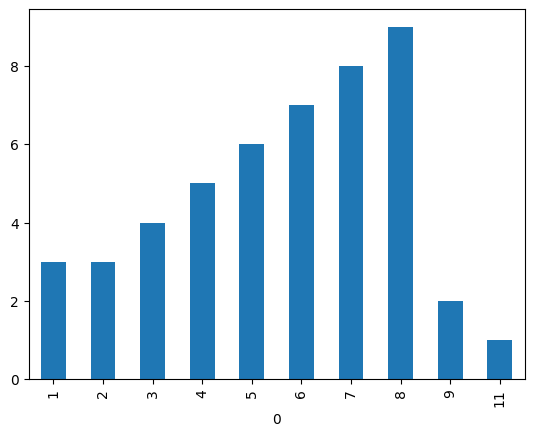

In [78]:
# Wykres danych lewoskrętnych
left_skewed_df[0].value_counts().sort_index().plot(kind='bar')

Policzmy miary centralne.

In [79]:
# Średnia danych lewoskrętnych
mean = left_skewed_df[0].mean()
mean

np.float64(5.625)

In [80]:
# Mediana danych lewoskrętnych
median = left_skewed_df[0].median()
median

np.float64(6.0)

In [81]:
# Dominanta danych lewoskrętnych
mode = left_skewed_df[0].mode()[0]
mode

np.int64(8)

I nanieśmy miary na nasz wykres.

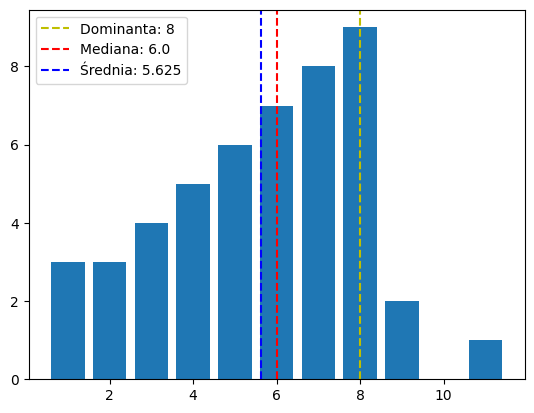

In [87]:
# Wykres z naniesionymi statystykami
import matplotlib.pyplot as plt

value_counts = left_skewed_df[0].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(value_counts.index, value_counts.values);

ax.axvline(x=mode, color='y', linestyle='--', label=f"Dominanta: {mode}");
ax.axvline(x=median, color='r', linestyle='--', label=f"Mediana: {median}");
ax.axvline(x=mean, color='b', linestyle='--', label=f"Średnia: {mean}");
ax.legend();

##### Dane zeroskrętne (symetryczne)

W danych z zerowym współczynnikiem skośności dane są rozłożone symetrycznie, a średnia, mediana i dominanta są równe lub bliskie sobie (mean = median = mode).

In [88]:
# Ramka z zeroskrętnymi danymi
zero_skewed_df = pd.DataFrame(data_zero_skewed)
zero_skewed_df

,0
0,1
1,1
2,2
3,2
4,3
5,3
6,3
7,4
8,4
9,4


<Axes: xlabel='0'>

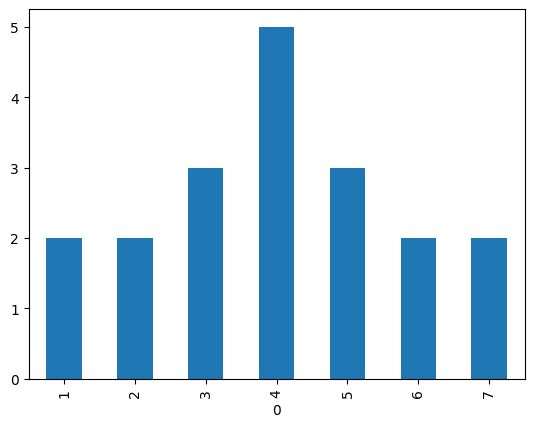

In [90]:
# wykres danych zeroskrętnych
zero_skewed_df[0].value_counts().sort_index().plot(kind='bar')

In [95]:
# średnia danych zeroskrętnych
mean = zero_skewed_df[0].mean()
mean

np.float64(4.0)

In [96]:
# mediana danych zeroskrętnych
median = zero_skewed_df[0].median()
median

np.float64(4.0)

In [97]:
# Dominanta danych zeroskrętnych
mode = zero_skewed_df[0].mode()[0]
mode

np.int64(4)

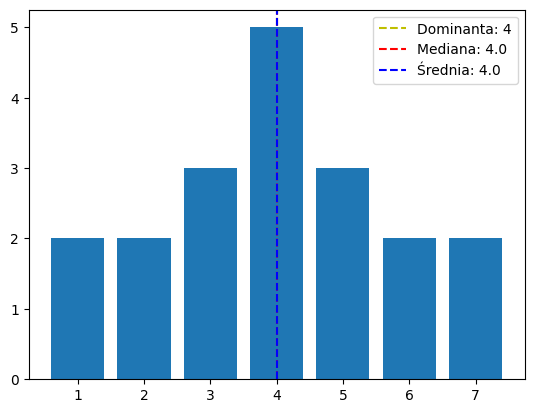

In [98]:
# Wykres z naniesionymi statystykami
import matplotlib.pyplot as plt

value_counts = zero_skewed_df[0].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(value_counts.index, value_counts.values);

ax.axvline(x=mode, color='y', linestyle='--', label=f"Dominanta: {mode}");
ax.axvline(x=median, color='r', linestyle='--', label=f"Mediana: {median}");
ax.axvline(x=mean, color='b', linestyle='--', label=f"Średnia: {mean}");
ax.legend();

##### Dane prawoskrętne

W danych prawoskrętnych wartości gromadzą się na prawo od wartości centralnej. W wyniku tego po prawej stronie jest więcej wartości, prawy ogon jest "cięży", wartości po prawej "ciągną" podatne miary na prawo. Średnia jako miara najbaridziej podatna ma wartość największą, mediana jest mniejsza, a najmniejsza jest domiananta (mean > median > mode).

In [ ]:
# Ramka z danymi prawoskrętnymi


In [ ]:
# Wykres danych prawoskrętnych


In [ ]:
# Średnia danych prawoskrętnych


In [ ]:
# mediana danych prawoskrętnych


In [ ]:
# dominanta danych prawoskrętnych


In [ ]:
# Wykres z naniesionymi statystykami


**Pytanie**

Które z poniższych stwierdzeń można wysnuć na temat próby na podstawie wykresu rozkładu?

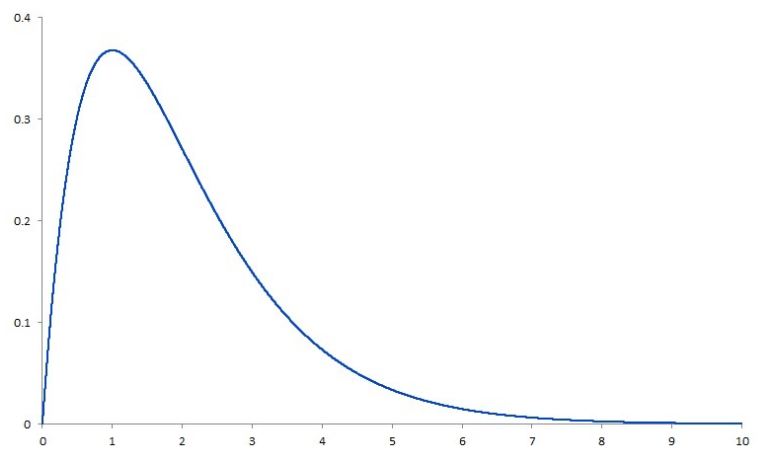

A. dane mają pozytywną skośność \
B. dane mają negatywną skośność \
C. dominanta jest większa od średniej \
D. żadne z powyższych

Omówiliśmy wszystkie najważniejsze miary dotyczące jednej zmiennej. Teraz zapoznajmy się z miarami, które stosujemy, gdy pracujemy z więcej niż jedną zmienną.

### Miary zależności pomiędzy zmiennymi

Omówimy miary, które mogą pomóc nam odkryć zależność między zmiennymi. Do najpopularniejszych należą:
- kowariancja
- współczynnik korelacji liniowej

Do przeanalizowania weźmy dane z rynku nieruchomości. Pomyślmy co ma wpływ na cenę domu. Na pewno jego powierzchnia. Weźmy te dwie zmienne i sprawdźmy, czy uda się nam odnaleźć zależności pomiędzy nimi.

W pliku `housing.csv` znajdują się dane domów ze stanu Kalifornia. Jest to jeden z popularniejszych zbiorów treningowych w uczeniu maszynowym. Popatrzmy na niego.

In [105]:
# Dane kalifornijskich domów
df = pd.read_csv("housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Interesuje nas wyłącznie powierzchnia i cena.

In [101]:
# Ramka z powierzchnią i ceną
data = df[['area', 'price']]
data

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


Chcemy sprawdzić, czy istnieje zależność pomiędzy tymi dwoma zmiennymi. Na początek możemy nanieść dane na wykres i oszacować organoleptycznie, czy w danych są widoczne jakieś tendencje.

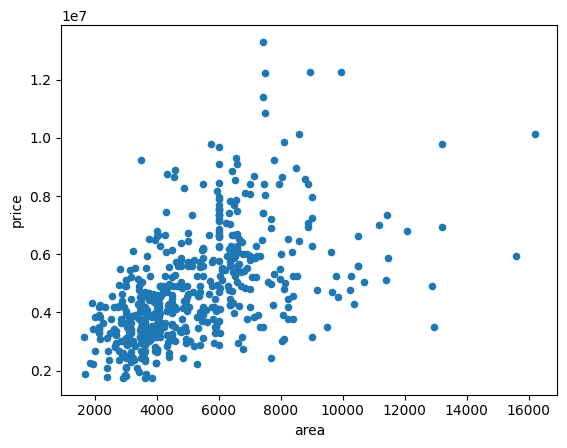

In [110]:
# Wykres punktowy powierzchnia(cena)
data.plot(kind='scatter', x='area', y='price');

Widzimy, że dane są mocno rozrzucone. Duża część danych jest blisko siebie, ale istnieją też bardzo mocne outliery na obu osiach. Zmieńmy obu osiom skalę na logarytmiczną (funkcja logarytmiczna jest monotoniczna, więc nie zepsuje nam to potencjalnej zależności jeżeli istnieje).

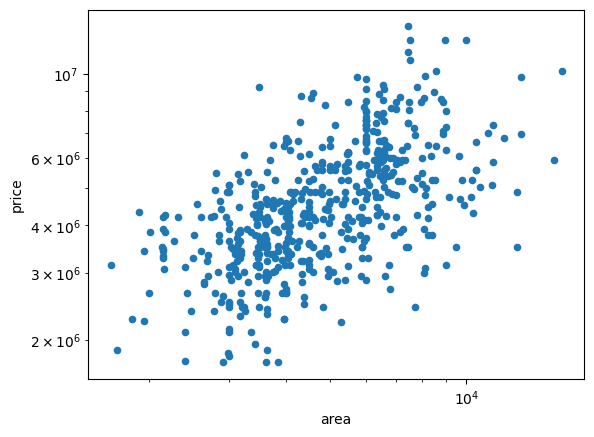

In [112]:
# wykres punktowy powierzchnia(cena), skala logarytmiczna
data.plot(kind='scatter', x='area', y='price', loglog=True);

Widzimy wyraźną zależność. W takiej sytuacji mówimy, że dane są **skorelowane**. Im większa powierzchnia tym większa cena domu. Taki typ korelacji nazywamy **korelacją dodatnią**. W jaki sposób możemy ilościowo opisać tę zależność?

Podatawową miarą korelacj dwóch zmiennych i jest **kowariancja**.

#### Kowariancja

Kowarancja (**ang. covariance**) wyraża się wzorem:
- dla populacji
$$\sigma_{xy}=\frac{\sum_{i=1}^{N}(x_i-\mu_x)\cdot(y_i-\mu_y)}{N}$$

- dla próby
$$s_{xy}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})\cdot(y_i-\bar{y})}{n-1}$$

W jaki sposób możemy rozumieć te wzory?

Spójrz na licznik. Mamy tam odległości od średniej. Iloczyn tych odległości. Jeżeli obie wartości "poruszają się" w tym samym kierunku to będzie dużo wartości z dodatnim znakiem. Jeżeli obie wartości "poruszają się" w przeciwnych kierunkach to będzie dużo wartości ze znakiem ujemnym.

Policzmy kowariancję.

In [114]:
# kowaraiancja powierzchni i ceny
cov_xy = data['area'].cov(data['price'])
cov_xy

np.float64(2175676334.874865)

Mamy dodatnią kowariancję.

Jest tylko jeden mały problem z kowariancją. Może ona przyjąć wartość 5 lub 50, ale także coś w rodzaju 0,0002345 albo nawet ponad setki milionów. Wartości o zupełnie innej skali! Kowariancja nie jest w żaden sposób znormalizowana. Poza samym znakiem wartość kowariancji jest bezużyteczna i zależy wyłącznie od skali (użytych jednostek).

Ale możemy ją przeskalować. Przez co? Przez standarowe odchylenie otrzymując w ten sposób względną miarę kowariancji (względem standarowego odchylenia), nazywaną współczynnikiem korelacji (pod tym względem współczynnik korelacji nie różni się niczym od omówionego już współczynnika wariancji).

#### Współczynnik korelacji

Współczynnik korelacji aka korelacja Pearsona (**ang. correlation coefficient aka Pearson correlation**) to nic innego jak przeskalowana kowariancja. Jest to najpopularniejszy estymator korelacji dwóch zmiennych. Dzięki niemu otrzymana wartość relacji między dwiema zmiennymi jest łatwa i intuicyjna do interpretacji. Współczynnik korelacji interpretujemy jako miarę tego jak zmienność jednej zmiennej tłumaczy zmienność drugiej zmiennej. Współczynnik korelacji na poziomie 1 lub -1 oznacza, że cała zmienność jednej zmiennej jest "wytłumaczona" przez drugą zmienną.

Formuła na współczynnik korelacji wyraża się wzorem:
- dla populacji:
$$\frac{\sigma_{xy}}{\sigma_{x}\cdot \sigma_y}$$

- dla próby:
$$\frac{s_{xy}}{s_{x}\cdot s_y}$$

Współczynnik korelacji przejmuje wartości z przedziału $[-1, 1]$. Przy czym -1 oznacza pełną korelację dodatnią, 1 pełną korelację dodatnią, a 0 brak korelacji.

Przykładem zerowej korelacji dwóch zmiennych może być cena kawy w Brazylii i cena mieszkań w Lublinie. Przykładem zmiennych o ujemnej korelacji może być liczba sprzedanych rozgrzewających herbat i liczba sprzedanych lodów w poszczególne dni. Przykładem dodatnie skorelowanych zmiennych mogą być liczba godzin poświęconych na naukę do egzaminu i wynik egzaminu.

Policzmy korelację pomiędzy zmiennymi z naszego przykładu.

In [115]:
# współczynnik korelacji powierzchnia i cena
cor_xy = data['area'].corr(data['price'])
cor_xy

np.float64(0.5359973457780801)

Widzimy korelację na poziomie 0.54 co oznacza, że powierzchnia i cena domu są ze sobą silnie, dodatnio skorelowane (czyli wraz ze wzrostem/spadkiem jednej zmiennej rośnie/spada wartość drugiej). Nie oznacza to jeszcze jednak przyczynowości co przenosi nas do omówionej już sentencji:

**Correlation is not causation**

ostrzeżenia, że samo istnienie korelacji między dwiema zmiennymi nie oznacza, że jedna z nich powoduje zmiany w drugiej. Korelacja pokazuje jedynie, że zmienne mogą być ze sobą powiązane, ale nie informuje o tym, która jest przyczyną, a która skutkiem – ani nawet o tym, czy takie powiązanie jest bezpośrednie, czy może wynikać z działania innego czynnika.